In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/data/nihaifeng/code/HeliosArtifact/simulator')
import utils

In [2]:
experiments = ['Earth', 'Saturn', 'Uranus', 'Venus']
jobs = []
for ept in experiments:
	trace_dir = f'/data/nihaifeng/code/HeliosArtifact/simulator/data/{ept}'
	vc_dict = pd.read_pickle(trace_dir+'/vc_dict_homo.pkl')
	trace_range = ('2020-07-01 00:00:00', '2020-07-31 23:59:00')
	# trace_range = ('2020-09-01 00:00:00', '2020-09-26 23:59:00')
	trace_df, _ = utils.trace_process(trace_dir, trace_range, vc_dict)
	gpu_num_type = trace_df['gpu_num'].unique()
	gpu_num_type = sorted(gpu_num_type)
	y = [len(trace_df[trace_df['gpu_num'] == x]) for x in gpu_num_type]
	print(ept, vc_dict)
	print(gpu_num_type)
	print(y)
	jobs.append(len(trace_df))
print(jobs)

Earth {'vchbv': 8, 'vc4om': 12, 'vcVP5': 22, 'vc6YE': 27, 'vchA3': 5, 'vccaA': 5, 'vcTJs': 9, 'vcvlY': 12, 'vcSoL': 4, 'vcMod': 8, 'vcpDC': 7, 'vc3sl': 8, 'vcJLV': 4, 'vcJkd': 2, 'vcdI0': 2, 'vcira': 2, 'vcgkz': 1}
[1, 2, 4, 8, 10, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152]
[88425, 841, 1491, 3805, 6, 1536, 333, 292, 29, 31, 11, 34, 34, 142, 1, 1, 1, 3, 10, 19, 30, 25, 2]
Saturn {'vczIT': 19, 'vcdoX': 18, 'vcOIr': 28, 'vciN1': 5, 'vcQ4H': 6, 'vcBLw': 34, 'vcofO': 28, 'vcikv': 20, 'vcVgR': 6, 'vcSE7': 18, 'vc19r': 18, 'vcWk1': 10, 'vcUV3': 16, 'vcIi0': 4, 'vczD2': 4, 'vchGU': 4, 'vcqdr': 16, 'vcOC9': 2, 'vc1z2': 2, 'vcmM6': 2}
[1, 2, 4, 8, 9, 12, 16, 21, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200, 208, 216, 224]
[94531, 3646, 9653, 17972, 2, 3, 2855, 4, 301, 1407, 162, 168, 56, 238, 78, 273, 98, 43, 8, 13, 45, 39, 5, 22, 6, 16, 20, 5, 18, 37, 11, 5, 3, 12]
Uranus {'vcVgR': 28, 'vcrV2': 35, '

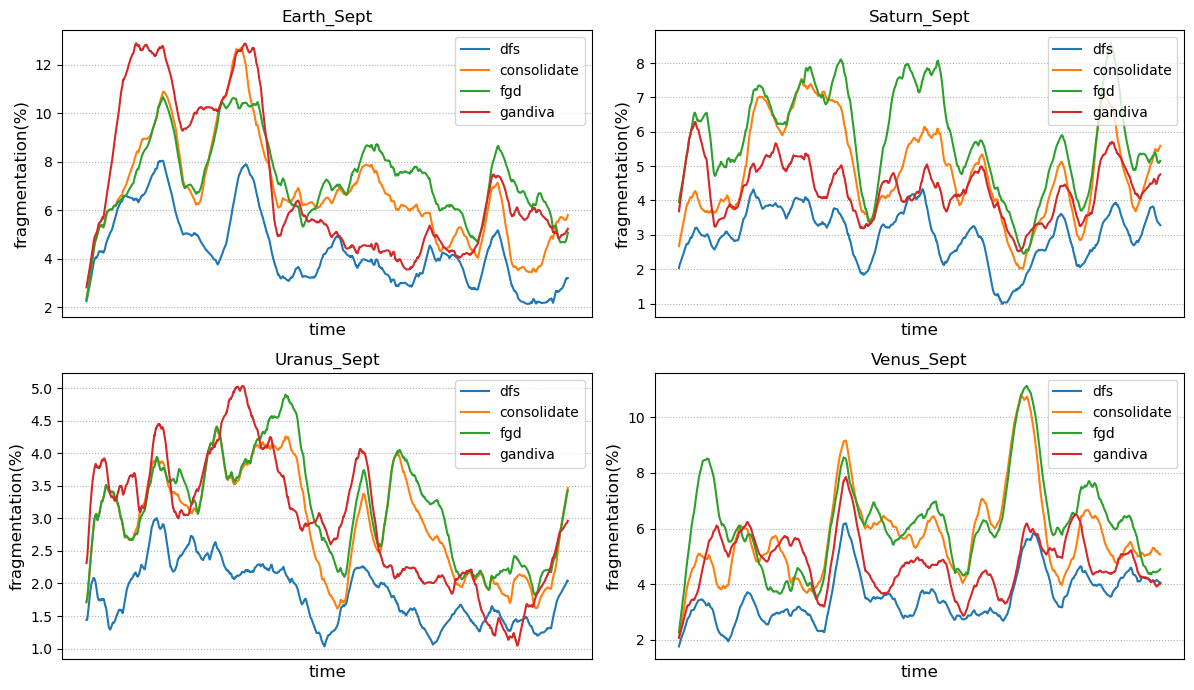

In [21]:
# schedulers = ["defragS_fifo","fifo_consolidate", "fifo_FGD", "gandiva_fifo"]
# labels = ["dfs-fifo", "consolidate-fifo", "fgd-fifo", "gandiva-fifo"]

schedulers = ["defragS_sdf", "sjf_consolidate", "sjf_FGD", "gandiva_sjf"]
labels = ["dfs", "consolidate", "fgd", "gandiva"]

log_dir = "/data/nihaifeng/log/test" 
window_size = 60 * 24 * 1

month = 'Sept'
experiments = ['Earth', 'Saturn', 'Uranus', 'Venus']

FIG_SIZE=(12, 7)
fig, axes = plt.subplots(2, 2, figsize=FIG_SIZE)  # 创建 2x2 的子图网格
axes = axes.flatten()  # 将 2D 数组展开成 1D，方便索引

for idx, ept in enumerate(experiments):
	ax = axes[idx]  # 获取对应的子图
	for i, scheduler in enumerate(schedulers):
		df = pd.read_csv(log_dir + f'/{ept}_{month}_{scheduler}/all/{scheduler}_all_seq.csv')
		y = df['fragmentation_ration'] * 100
		ax.plot(df['time'], y.rolling(window=window_size).mean(), label=labels[i])

	ax.set_xlabel('time', fontsize=12)
	ax.set_title(f'{ept}_{month}', fontsize=12)
	ax.set_xticks([])  # 隐藏 x 轴刻度
	ax.set_ylabel('fragmentation(%)', fontsize=12)
	ax.legend(loc='best', fontsize=10)
	ax.grid(linestyle=':')

# 调整子图间距
plt.tight_layout()
plt.show()


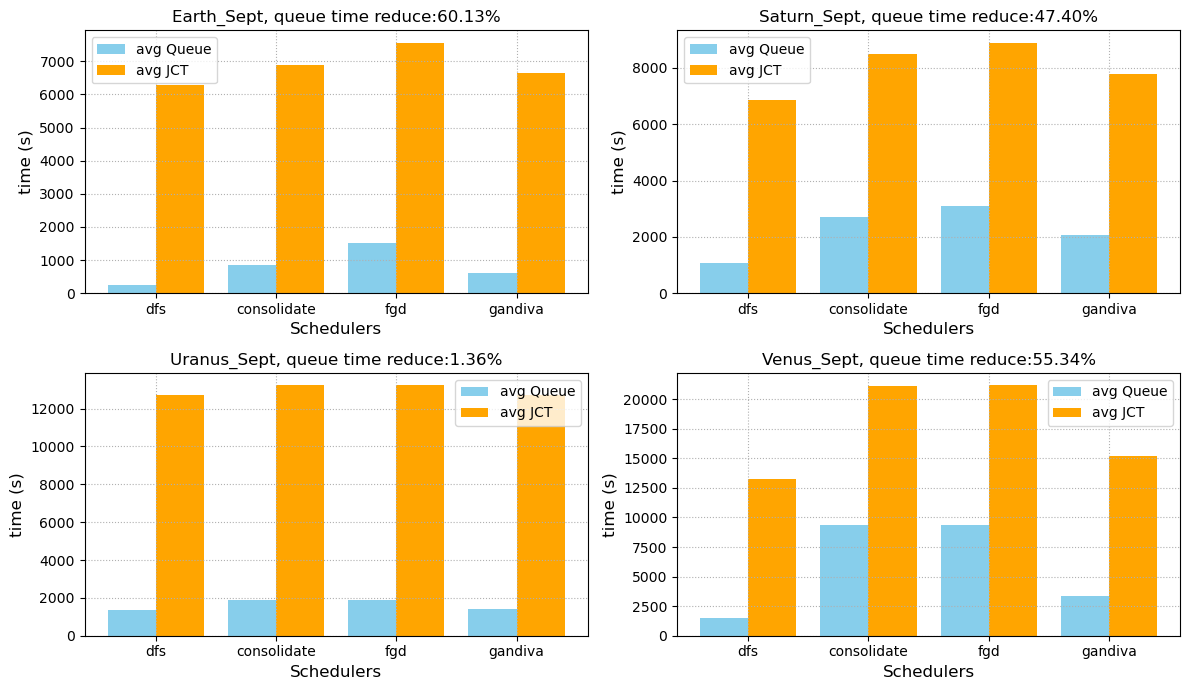

In [22]:
fig, axes = plt.subplots(2, 2, figsize=FIG_SIZE)  # 创建 2x2 的子图网格
axes = axes.flatten()  # 将 2D 数组展开成 1D，方便索引

for idx, ept in enumerate(experiments):
	ax = axes[idx]  # 获取对应的子图
	que_list, jct_list = [], []
	for i, scheduler in enumerate(schedulers):
		df = pd.read_csv(log_dir+f'/{ept}_{month}_{scheduler}/jct_avg.csv')
		jct_list.append(df.iloc[len(df)-1, 1])
		df = pd.read_csv(log_dir+f'/{ept}_{month}_{scheduler}/que_avg.csv')
		que_list.append(df.iloc[len(df)-1, 1])

	# 设置柱状图的宽度和位置
	x_indices = np.arange(len(schedulers))  # x 轴位置
	bar_width = 0.4  # 每个柱的宽度

	# 绘制两组柱状图
	ax.bar(x_indices - bar_width/2, que_list, bar_width, label='avg Queue', color='skyblue')
	ax.bar(x_indices + bar_width/2, jct_list, bar_width, label='avg JCT', color='orange')

	que_list.sort()
	ax.set_title(f'{ept}_{month}, queue time reduce:{(que_list[1]-que_list[0])/que_list[1]*100:.2f}%', fontsize=12)
	ax.set_xlabel("Schedulers", fontsize=12)
	ax.set_ylabel("time (s)", fontsize=12)
	ax.set_xticks(x_indices)
	ax.set_xticklabels(labels)	
	ax.legend(loc='best', fontsize=10)
	ax.grid(linestyle=':')

# 调整子图间距
plt.tight_layout()
plt.show()

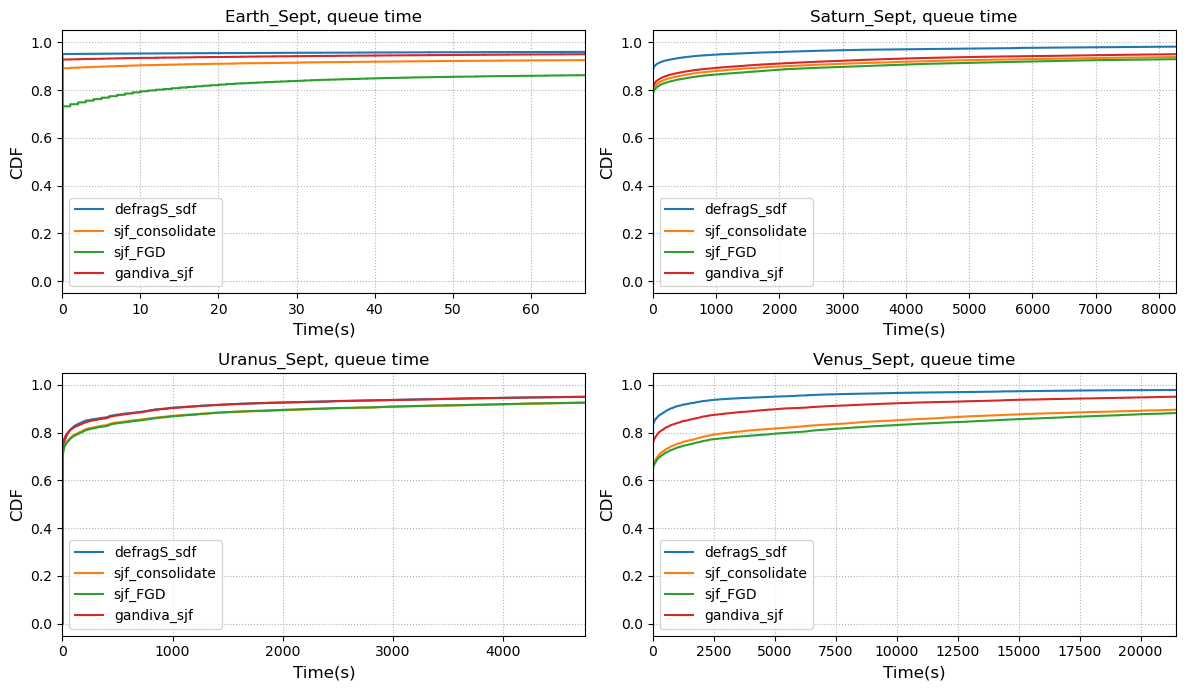

In [24]:
data_type = "queue"

fig, axes = plt.subplots(2, 2, figsize=FIG_SIZE)  # 创建 2x2 的子图网格
axes = axes.flatten()  # 将 2D 数组展开成 1D，方便索引

for idx, ept in enumerate(experiments):
	ax = axes[idx]  # 获取对应的子图
	for idx, scheduler in enumerate(schedulers):
		df = pd.read_csv(log_dir+f'/{ept}_{month}_{scheduler}/all/{scheduler}_all_log.csv')
		y = df[data_type]
		sorted_y = np.sort(y)
		cdf = np.arange(1, len(sorted_y) + 1) / len(sorted_y)
		ax.plot(sorted_y, cdf, label=scheduler)

	x_min = np.min(sorted_y)
	x_max = np.percentile(sorted_y, 95)  # 选择中位数作为最大范围
	ax.set_xlim(x_min, x_max)  # 设置 x 轴范围

	ax.set_title(f'{ept}_{month}, {data_type} time', fontsize=12)
	ax.set_xlabel('Time(s)', fontsize=12)
	ax.set_ylabel('CDF', fontsize=12)
	ax.legend(loc='best', fontsize=10)
	ax.grid(linestyle=':')

# 调整子图间距
plt.tight_layout()
plt.show()

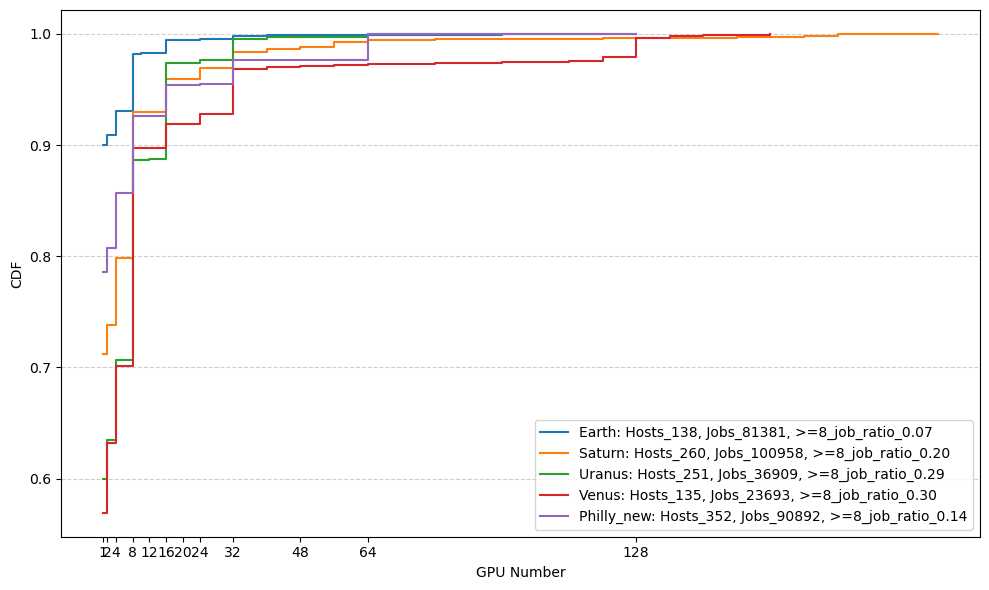

In [33]:
###### jog req GPUs CDF 
trace_dir = '/data/nihaifeng/code/HeliosArtifact/simulator/data/'
experiments = ['Earth', 'Saturn', 'Uranus', 'Venus', 'Philly_new']
month = 'Sept'

fig = plt.figure(figsize=(10,6))
for epts in experiments:
	splits = epts.split('_')
	ept = epts.split('_')[0]
	suffix = epts.split('_')[1] if len(splits) > 1 else None

	vc_dict = pd.read_pickle(trace_dir+f'{ept}/vc_dict_homo.pkl')
	if ept == 'Philly':
		mutation = True if suffix == 'new' else False
		trace_range = trace_range = ('2017-10-01 00:00:00', '2017-11-30 23:59:00')
		trace_df, _ = utils.trace_philly_process(trace_dir+ept, trace_range, vc_dict, need_mutation=mutation)
	else:
		if 'Sept' == month:
			trace_range = ('2020-09-01 00:00:00', '2020-09-26 23:59:00')
			trace_df, _ = utils.trace_process(trace_dir+ept, trace_range, vc_dict)
		elif 'July' == month:
			trace_range = ('2020-07-01 00:00:00', '2020-07-31 23:59:00')
			trace_df, _ = utils.trace_process(trace_dir+ept, trace_range, vc_dict)

	gpu_num_type = trace_df['gpu_num'].unique()
	gpu_num_type = sorted(gpu_num_type)
	y = [len(trace_df[trace_df['gpu_num'] == x]) for x in gpu_num_type]
	# 计算 CDF
	y_cumsum = np.cumsum(y)  # 累加频率
	y_cdf = y_cumsum / sum(y)  # 归一化
	# 绘制 CDF 图
	plt.step(gpu_num_type, y_cdf, where='post', label=f"{epts}: Hosts_{sum(vc_dict.values())}, Jobs_{trace_df.shape[0]}, >=8_job_ratio_{sum([y[i] for i in range(len(gpu_num_type)) if gpu_num_type[i] >= 8])/trace_df.shape[0]:.2f}")

plt.xlabel('GPU Number')
plt.ylabel('CDF')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(gpu_num_type)
plt.legend()
plt.tight_layout()
plt.show()